___
# Logistic Regression Project 

In this project we will be working with an advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. 

We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [3]:
ad_data = pd.read_csv("advertising.csv")

**Check the head of ad_data**

In [4]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

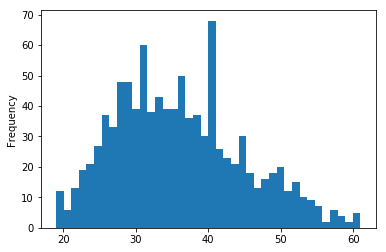

In [10]:
ad_data['Age'].plot.hist(bins=40)

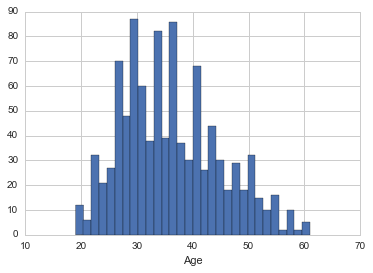

**Create a jointplot showing Area Income versus Age.**

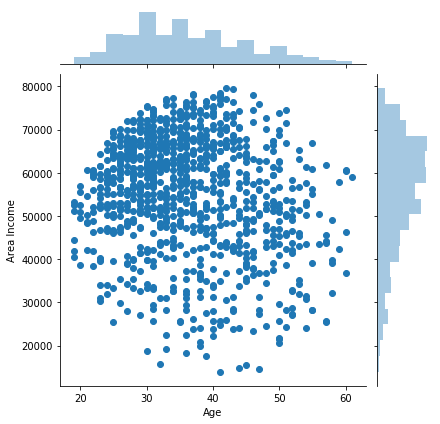

In [11]:
sns.jointplot(x='Age', y='Area Income', kind='scatter', data=ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

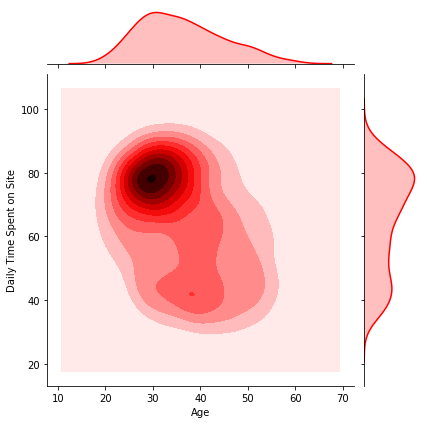

In [26]:
sns.jointplot(x='Age', y='Daily Time Spent on Site',kind='kde',data=ad_data,color='red');

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

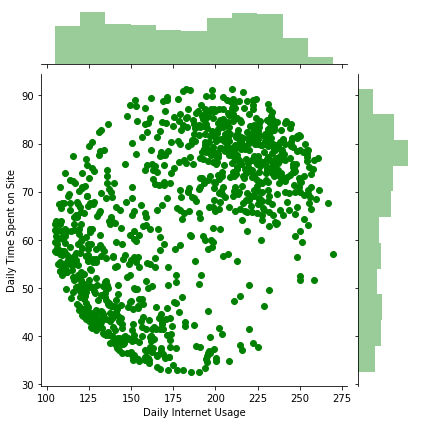

In [33]:
sns.jointplot(x='Daily Internet Usage', y='Daily Time Spent on Site', data=ad_data, color='green', kind='scatter')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [38]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [40]:
X=ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y=ad_data['Clicked on Ad']

In [41]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

** Train and fit a logistic regression model on the training set.**

In [43]:
logmodel=LogisticRegression()

In [44]:
logmodel.fit(X_train, y_train)

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [45]:
prediction=logmodel.predict(X_test)

In [49]:
type(prediction)

numpy.ndarray

In [56]:
prediction

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0], d

In [53]:
ad_data2=pd.concat([ad_data, pd.DataFrame(prediction)])
ad_data2

,0,Ad Topic Line,Age,Area Income,City,Clicked on Ad,Country,Daily Internet Usage,Daily Time Spent on Site,Male,Timestamp
0,NaN,Cloned 5thgeneration orchestration,35.0,61833.90,Wrightburgh,0.0,Tunisia,256.09,68.95,0.0,2016-03-27 00:53:11
1,NaN,Monitored national standardization,31.0,68441.85,West Jodi,0.0,Nauru,193.77,80.23,1.0,2016-04-04 01:39:02
2,NaN,Organic bottom-line service-desk,26.0,59785.94,Davidton,0.0,San Marino,236.50,69.47,0.0,2016-03-13 20:35:42
3,NaN,Triple-buffered reciprocal time-frame,29.0,54806.18,West Terrifurt,0.0,Italy,245.89,74.15,1.0,2016-01-10 02:31:19
4,NaN,Robust logistical utilization,35.0,73889.99,South Manuel,0.0,Iceland,225.58,68.37,0.0,2016-06-03 03:36:18
5,NaN,Sharable client-driven software,23.0,59761.56,Jamieberg,0.0,Norway,226.74,59.99,1.0,2016-05-19 14:30:17
6,NaN,Enhanced dedicated support,33.0,53852.85,Brandonstad,0.0,Myanmar,208.36,88.91,0.0,2016-01-28 20:59:32
7,NaN,Reactive local challenge,48.0,24593.33,Port Jefferybury,1.0,Australia,131.76,66.00,1.0,2016-03-07 01:40:15
8,NaN,Configurable coherent function,30.0,68862.00,West Colin,0.0,Grenada,221.51,74.53,1.0,2016-04-18 09:33:42
9,NaN,Mandatory homogeneous architecture,20.0,55642.32,Ramirezton,0.0,Ghana,183.82,69.88,1.0,2016-07-11 01:42:51


**Create a classification report for the model.**

In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [47]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       146
           1       0.96      0.82      0.89       154

   micro avg       0.89      0.89      0.89       300
   macro avg       0.90      0.90      0.89       300
weighted avg       0.90      0.89      0.89       300



In [48]:
print(confusion_matrix(y_test, prediction))

[[141   5]
 [ 27 127]]


## Great Job!